# --- 1. Import bibliotek ---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display, clear_output

pd.set_option('display.max_columns', None)

sns.set(style='whitegrid')

# --- 2. Wczytanie danych ---

,label,image_id,0_point_lm_0_x,0_point_lm_0_y,0_point_lm_0_z,0_point_lm_1_x,0_point_lm_1_y,0_point_lm_1_z,0_point_lm_2_x,0_point_lm_2_y,0_point_lm_2_z,0_point_lm_3_x,0_point_lm_3_y,0_point_lm_3_z,0_point_lm_4_x,0_point_lm_4_y,0_point_lm_4_z,0_point_lm_5_x,0_point_lm_5_y,0_point_lm_5_z,0_point_lm_6_x,0_point_lm_6_y,0_point_lm_6_z,0_point_lm_7_x,0_point_lm_7_y,0_point_lm_7_z,0_point_lm_8_x,0_point_lm_8_y,0_point_lm_8_z,0_point_lm_9_x,0_point_lm_9_y,0_point_lm_9_z,0_point_lm_10_x,0_point_lm_10_y,0_point_lm_10_z,0_point_lm_11_x,0_point_lm_11_y,0_point_lm_11_z,0_point_lm_12_x,0_point_lm_12_y,0_point_lm_12_z,0_point_lm_13_x,0_point_lm_13_y,0_point_lm_13_z,0_point_lm_14_x,0_point_lm_14_y,0_point_lm_14_z,0_point_lm_15_x,0_point_lm_15_y,0_point_lm_15_z,0_point_lm_16_x,0_point_lm_16_y,0_point_lm_16_z,0_point_lm_17_x,0_point_lm_17_y,0_point_lm_17_z,0_point_lm_18_x,0_point_lm_18_y,0_point_lm_18_z,0_point_lm_19_x,0_point_lm_19_y,0_point_lm_19_z,0_point_lm_20_x,0_point_lm_20_y,0_point_lm_20_z,0_point_vec_3-4_vx,0_point_vec_3-4_vy,0_point_vec_3-4_vz,0_point_vec_0-5_vx,0_point_vec_0-5_vy,0_point_vec_0-5_vz,0_point_vec_17-18_vx,0_point_vec_17-18_vy,0_point_vec_17-18_vz,0_point_vec_0-17_vx,0_point_vec_0-17_vy,0_point_vec_0-17_vz,0_point_vec_13-14_vx,0_point_vec_13-14_vy,0_point_vec_13-14_vz,0_point_vec_13-17_vx,0_point_vec_13-17_vy,0_point_vec_13-17_vz,0_point_vec_18-19_vx,0_point_vec_18-19_vy,0_point_vec_18-19_vz,0_point_vec_5-6_vx,0_point_vec_5-6_vy,0_point_vec_5-6_vz,0_point_vec_5-9_vx,0_point_vec_5-9_vy,0_point_vec_5-9_vz,0_point_vec_14-15_vx,0_point_vec_14-15_vy,0_point_vec_14-15_vz,0_point_vec_0-1_vx,0_point_vec_0-1_vy,0_point_vec_0-1_vz,0_point_vec_9-10_vx,0_point_vec_9-10_vy,0_point_vec_9-10_vz,0_point_vec_1-2_vx,0_point_vec_1-2_vy,0_point_vec_1-2_vz,0_point_vec_9-13_vx,0_point_vec_9-13_vy,0_point_vec_9-13_vz,0_point_vec_10-11_vx,0_point_vec_10-11_vy,0_point_vec_10-11_vz,0_point_vec_19-20_vx,0_point_vec_19-20_vy,0_point_vec_19-20_vz,0_point_vec_6-7_vx,0_point_vec_6-7_vy,0_point_vec_6-7_vz,0_point_vec_15-16_vx,0_point_vec_15-16_vy,0_point_vec_15-16_vz,0_point_vec_2-3_vx,0_point_vec_2-3_vy,0_point_vec_2-3_vz,0_point_vec_11-12_vx,0_point_vec_11-12_vy,0_point_vec_11-12_vz,0_point_vec_7-8_vx,0_point_vec_7-8_vy,0_point_vec_7-8_vz,1_point_lm_0_x,1_point_lm_0_y,1_point_lm_0_z,1_point_lm_1_x,1_point_lm_1_y,1_point_lm_1_z,1_point_lm_2_x,1_point_lm_2_y,1_point_lm_2_z,1_point_lm_3_x,1_point_lm_3_y,1_point_lm_3_z,1_point_lm_4_x,1_point_lm_4_y,1_point_lm_4_z,1_point_lm_5_x,1_point_lm_5_y,1_point_lm_5_z,1_point_lm_6_x,1_point_lm_6_y,1_point_lm_6_z,1_point_lm_7_x,1_point_lm_7_y,1_point_lm_7_z,1_point_lm_8_x,1_point_lm_8_y,1_point_lm_8_z,1_point_lm_9_x,1_point_lm_9_y,1_point_lm_9_z,1_point_lm_10_x,1_point_lm_10_y,1_point_lm_10_z,1_point_lm_11_x,1_point_lm_11_y,1_point_lm_11_z,1_point_lm_12_x,1_point_lm_12_y,1_point_lm_12_z,1_point_lm_13_x,1_point_lm_13_y,1_point_lm_13_z,1_point_lm_14_x,1_point_lm_14_y,1_point_lm_14_z,1_point_lm_15_x,1_point_lm_15_y,1_point_lm_15_z,1_point_lm_16_x,1_point_lm_16_y,1_point_lm_16_z,1_point_lm_17_x,1_point_lm_17_y,1_point_lm_17_z,1_point_lm_18_x,1_point_lm_18_y,1_point_lm_18_z,1_point_lm_19_x,1_point_lm_19_y,1_point_lm_19_z,1_point_lm_20_x,1_point_lm_20_y,1_point_lm_20_z,1_point_vec_3-4_vx,1_point_vec_3-4_vy,1_point_vec_3-4_vz,1_point_vec_0-5_vx,1_point_vec_0-5_vy,1_point_vec_0-5_vz,1_point_vec_17-18_vx,1_point_vec_17-18_vy,1_point_vec_17-18_vz,1_point_vec_0-17_vx,1_point_vec_0-17_vy,1_point_vec_0-17_vz,1_point_vec_13-14_vx,1_point_vec_13-14_vy,1_point_vec_13-14_vz,1_point_vec_13-17_vx,1_point_vec_13-17_vy,1_point_vec_13-17_vz,1_point_vec_18-19_vx,1_point_vec_18-19_vy,1_point_vec_18-19_vz,1_point_vec_5-6_vx,1_point_vec_5-6_vy,1_point_vec_5-6_vz,1_point_vec_5-9_vx,1_point_vec_5-9_vy,1_point_vec_5-9_vz,1_point_vec_14-15_vx,1_point_vec_14-15_vy,1_point_vec_14-15_vz,1_point_vec_0-1_vx,1_point_vec_0-1_vy,1_point_vec_0-1_vz,1_point_vec_9-10_vx,1_point_vec_9-10_vy,1_point_vec_9-10_vz,1_point_vec_1-2_vx,1_point_vec_1-2_vy,1_point_ve

,image_id,0_point_lm_0_x,0_point_lm_0_y,0_point_lm_0_z,0_point_lm_1_x,0_point_lm_1_y,0_point_lm_1_z,0_point_lm_2_x,0_point_lm_2_y,0_point_lm_2_z,0_point_lm_3_x,0_point_lm_3_y,0_point_lm_3_z,0_point_lm_4_x,0_point_lm_4_y,0_point_lm_4_z,0_point_lm_5_x,0_point_lm_5_y,0_point_lm_5_z,0_point_lm_6_x,0_point_lm_6_y,0_point_lm_6_z,0_point_lm_7_x,0_point_lm_7_y,0_point_lm_7_z,0_point_lm_8_x,0_point_lm_8_y,0_point_lm_8_z,0_point_lm_9_x,0_point_lm_9_y,0_point_lm_9_z,0_point_lm_10_x,0_point_lm_10_y,0_point_lm_10_z,0_point_lm_11_x,0_point_lm_11_y,0_point_lm_11_z,0_point_lm_12_x,0_point_lm_12_y,0_point_lm_12_z,0_point_lm_13_x,0_point_lm_13_y,0_point_lm_13_z,0_point_lm_14_x,0_point_lm_14_y,0_point_lm_14_z,0_point_lm_15_x,0_point_lm_15_y,0_point_lm_15_z,0_point_lm_16_x,0_point_lm_16_y,0_point_lm_16_z,0_point_lm_17_x,0_point_lm_17_y,0_point_lm_17_z,0_point_lm_18_x,0_point_lm_18_y,0_point_lm_18_z,0_point_lm_19_x,0_point_lm_19_y,0_point_lm_19_z,0_point_lm_20_x,0_point_lm_20_y,0_point_lm_20_z,0_point_vec_3-4_vx,0_point_vec_3-4_vy,0_point_vec_3-4_vz,0_point_vec_0-5_vx,0_point_vec_0-5_vy,0_point_vec_0-5_vz,0_point_vec_17-18_vx,0_point_vec_17-18_vy,0_point_vec_17-18_vz,0_point_vec_0-17_vx,0_point_vec_0-17_vy,0_point_vec_0-17_vz,0_point_vec_13-14_vx,0_point_vec_13-14_vy,0_point_vec_13-14_vz,0_point_vec_13-17_vx,0_point_vec_13-17_vy,0_point_vec_13-17_vz,0_point_vec_18-19_vx,0_point_vec_18-19_vy,0_point_vec_18-19_vz,0_point_vec_5-6_vx,0_point_vec_5-6_vy,0_point_vec_5-6_vz,0_point_vec_5-9_vx,0_point_vec_5-9_vy,0_point_vec_5-9_vz,0_point_vec_14-15_vx,0_point_vec_14-15_vy,0_point_vec_14-15_vz,0_point_vec_0-1_vx,0_point_vec_0-1_vy,0_point_vec_0-1_vz,0_point_vec_9-10_vx,0_point_vec_9-10_vy,0_point_vec_9-10_vz,0_point_vec_1-2_vx,0_point_vec_1-2_vy,0_point_vec_1-2_vz,0_point_vec_9-13_vx,0_point_vec_9-13_vy,0_point_vec_9-13_vz,0_point_vec_10-11_vx,0_point_vec_10-11_vy,0_point_vec_10-11_vz,0_point_vec_19-20_vx,0_point_vec_19-20_vy,0_point_vec_19-20_vz,0_point_vec_6-7_vx,0_point_vec_6-7_vy,0_point_vec_6-7_vz,0_point_vec_15-16_vx,0_point_vec_15-16_vy,0_point_vec_15-16_vz,0_point_vec_2-3_vx,0_point_vec_2-3_vy,0_point_vec_2-3_vz,0_point_vec_11-12_vx,0_point_vec_11-12_vy,0_point_vec_11-12_vz,0_point_vec_7-8_vx,0_point_vec_7-8_vy,0_point_vec_7-8_vz,1_point_lm_0_x,1_point_lm_0_y,1_point_lm_0_z,1_point_lm_1_x,1_point_lm_1_y,1_point_lm_1_z,1_point_lm_2_x,1_point_lm_2_y,1_point_lm_2_z,1_point_lm_3_x,1_point_lm_3_y,1_point_lm_3_z,1_point_lm_4_x,1_point_lm_4_y,1_point_lm_4_z,1_point_lm_5_x,1_point_lm_5_y,1_point_lm_5_z,1_point_lm_6_x,1_point_lm_6_y,1_point_lm_6_z,1_point_lm_7_x,1_point_lm_7_y,1_point_lm_7_z,1_point_lm_8_x,1_point_lm_8_y,1_point_lm_8_z,1_point_lm_9_x,1_point_lm_9_y,1_point_lm_9_z,1_point_lm_10_x,1_point_lm_10_y,1_point_lm_10_z,1_point_lm_11_x,1_point_lm_11_y,1_point_lm_11_z,1_point_lm_12_x,1_point_lm_12_y,1_point_lm_12_z,1_point_lm_13_x,1_point_lm_13_y,1_point_lm_13_z,1_point_lm_14_x,1_point_lm_14_y,1_point_lm_14_z,1_point_lm_15_x,1_point_lm_15_y,1_point_lm_15_z,1_point_lm_16_x,1_point_lm_16_y,1_point_lm_16_z,1_point_lm_17_x,1_point_lm_17_y,1_point_lm_17_z,1_point_lm_18_x,1_point_lm_18_y,1_point_lm_18_z,1_point_lm_19_x,1_point_lm_19_y,1_point_lm_19_z,1_point_lm_20_x,1_point_lm_20_y,1_point_lm_20_z,1_point_vec_3-4_vx,1_point_vec_3-4_vy,1_point_vec_3-4_vz,1_point_vec_0-5_vx,1_point_vec_0-5_vy,1_point_vec_0-5_vz,1_point_vec_17-18_vx,1_point_vec_17-18_vy,1_point_vec_17-18_vz,1_point_vec_0-17_vx,1_point_vec_0-17_vy,1_point_vec_0-17_vz,1_point_vec_13-14_vx,1_point_vec_13-14_vy,1_point_vec_13-14_vz,1_point_vec_13-17_vx,1_point_vec_13-17_vy,1_point_vec_13-17_vz,1_point_vec_18-19_vx,1_point_vec_18-19_vy,1_point_vec_18-19_vz,1_point_vec_5-6_vx,1_point_vec_5-6_vy,1_point_vec_5-6_vz,1_point_vec_5-9_vx,1_point_vec_5-9_vy,1_point_vec_5-9_vz,1_point_vec_14-15_vx,1_point_vec_14-15_vy,1_point_vec_14-15_vz,1_point_vec_0-1_vx,1_point_vec_0-1_vy,1_point_vec_0-1_vz,1_point_vec_9-10_vx,1_point_vec_9-10_vy,1_point_vec_9-10_vz,1_point_vec_1-2_vx,1_point_vec_1-2_vy,1_point_vec_1-2_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11444 entries, 0 to 11443
Columns: 380 entries, label to 2_point_vec_7-8_vz
dtypes: float64(378), int64(1), object(1)
memory usage: 33.2+ MB


None

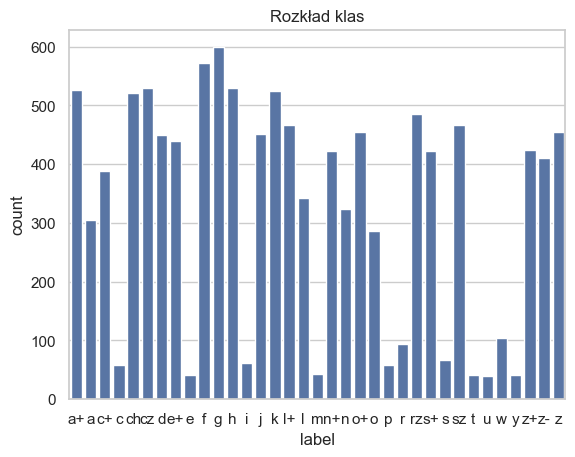

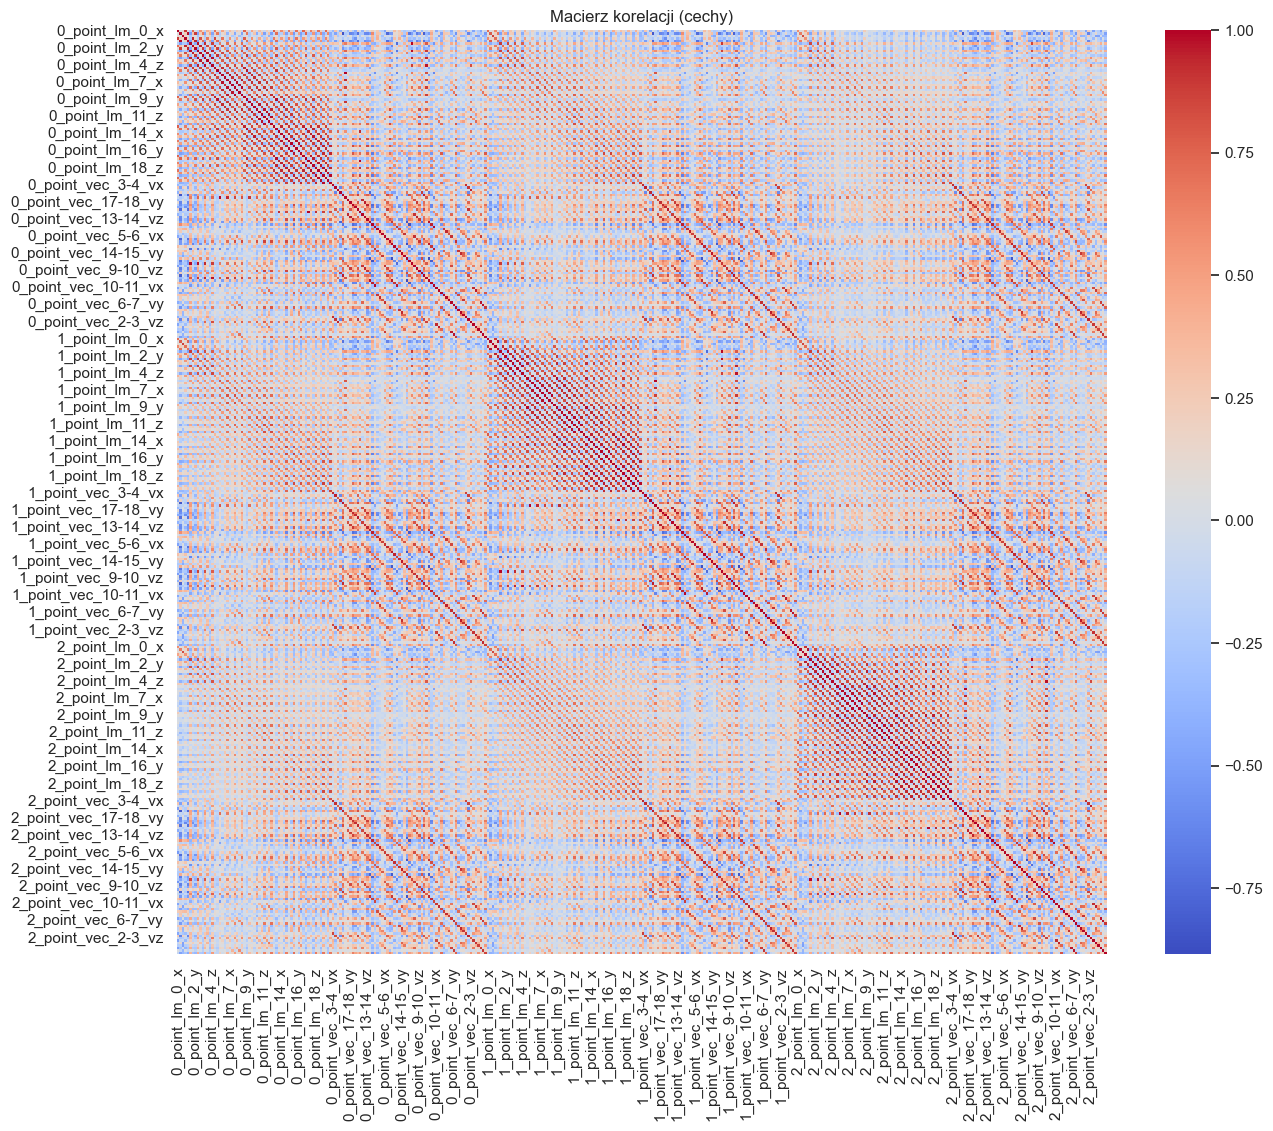

In [2]:
data = pd.read_excel("złączone_dane.xlsx")

display(data.head())
display(data.describe())
display(data.info())

sns.countplot(x='label', data=data)
plt.title('Rozkład klas')
plt.show()

data = data.drop("image_id", axis=1)

# Usuwanie kolumn 3_p, 4_p, 5_p
for column in data.columns:
    if '3_p' in column or '4_p' in column or '5_p' in column:
        data = data.drop(column, axis=1)

# Usunięcie kolumny label przed liczeniem korelacji
features_only = data.drop('label', axis=1)


plt.figure(figsize=(15, 12))
sns.heatmap(features_only.corr(), cmap='coolwarm')
plt.title('Macierz korelacji (cechy)')
plt.show()

# --- 3. Przygotowanie danych ---

In [3]:
y = data['label']
X = data.drop('label', axis=1)

# Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zbiór treningowy/testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Rozmiar treningowy: {X_train.shape}")
print(f"Rozmiar testowy: {X_test.shape}")

Rozmiar treningowy: (9155, 378)
Rozmiar testowy: (2289, 378)


# --- 4. Definicja modeli ---

🔵 Model: Random Forest
Dokładność: 0.9878

Raport klasyfikacji:
               precision    recall  f1-score   support

           a       0.94      0.98      0.96        62
          a+       1.00      1.00      1.00       109
           c       1.00      0.70      0.82        10
          c+       0.99      1.00      0.99        82
          ch       1.00      1.00      1.00       114
          cz       1.00      1.00      1.00        99
           d       1.00      1.00      1.00        97
           e       0.86      1.00      0.92         6
          e+       1.00      1.00      1.00        85
           f       1.00      1.00      1.00       121
           g       1.00      1.00      1.00       132
           h       0.99      1.00      1.00       103
           i       1.00      0.85      0.92        13
           j       0.99      1.00      0.99        89
           k       0.99      1.00      1.00       101
           l       1.00      0.97      0.99        73
          l+    

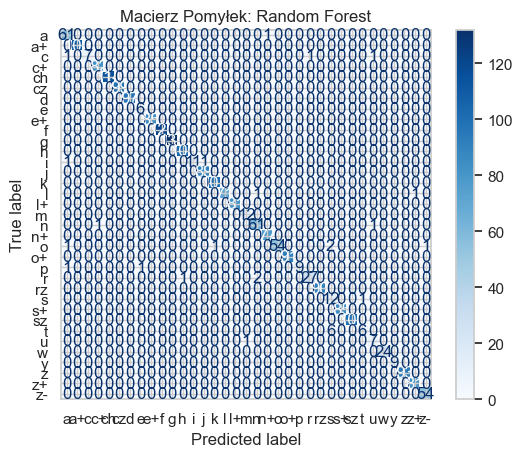

🔵 Model: Logistic Regression
Dokładność: 0.9755

Raport klasyfikacji:
               precision    recall  f1-score   support

           a       1.00      0.98      0.99        62
          a+       1.00      0.99      1.00       109
           c       0.62      0.50      0.56        10
          c+       0.99      1.00      0.99        82
          ch       0.95      0.98      0.97       114
          cz       1.00      0.99      0.99        99
           d       0.97      1.00      0.98        97
           e       0.71      0.83      0.77         6
          e+       0.99      1.00      0.99        85
           f       1.00      1.00      1.00       121
           g       0.99      1.00      0.99       132
           h       1.00      0.96      0.98       103
           i       1.00      0.77      0.87        13
           j       0.97      1.00      0.98        89
           k       1.00      1.00      1.00       101
           l       1.00      1.00      1.00        73
          

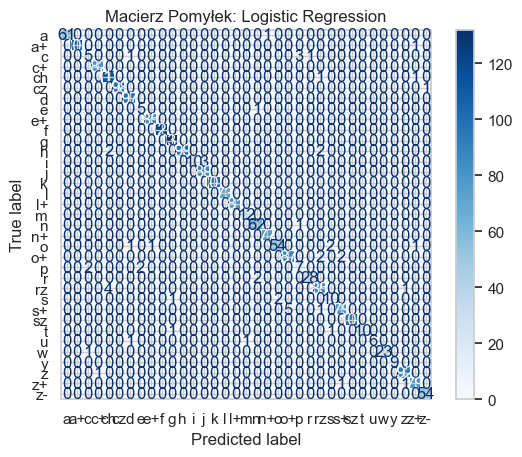

🔵 Model: K-Nearest Neighbors
Dokładność: 0.9336

Raport klasyfikacji:
               precision    recall  f1-score   support

           a       0.95      0.98      0.97        62
          a+       0.96      0.99      0.98       109
           c       1.00      0.80      0.89        10
          c+       0.97      0.94      0.96        82
          ch       0.85      0.94      0.89       114
          cz       0.92      0.99      0.96        99
           d       0.97      0.99      0.98        97
           e       0.62      0.83      0.71         6
          e+       0.97      0.92      0.95        85
           f       0.98      0.99      0.99       121
           g       0.99      1.00      1.00       132
           h       0.86      0.93      0.89       103
           i       1.00      0.85      0.92        13
           j       0.99      0.93      0.96        89
           k       0.99      1.00      1.00       101
           l       0.99      0.99      0.99        73
          

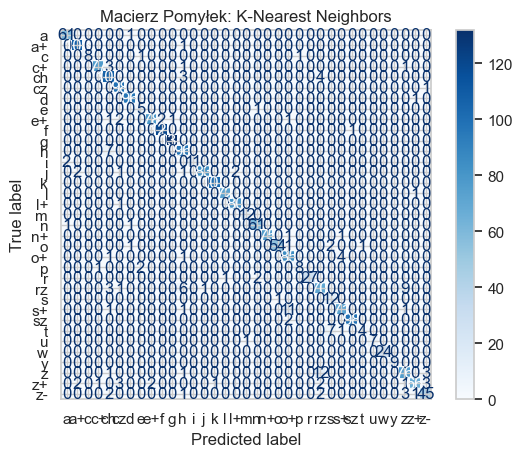

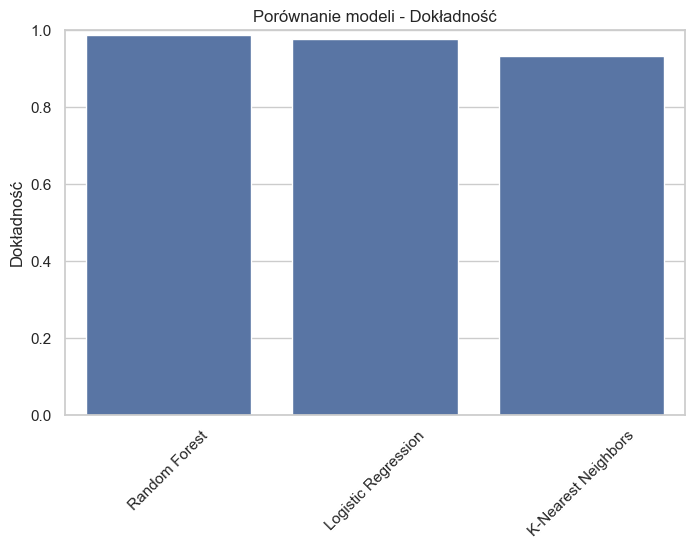

In [4]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

def train_and_evaluate_model(name, model):
    print(f"🔵 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Dokładność: {acc:.4f}")
    print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Macierz Pomyłek: {name}')
    plt.show()
    return acc

# Trenowanie i ocena wszystkich modeli
results = {}
for name, model in models.items():
    acc = train_and_evaluate_model(name, model)
    results[name] = acc

# Porównanie wyników
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Porównanie modeli - Dokładność')
plt.ylabel('Dokładność')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# --- 5. Budowa własnej sieci neuronowej (Keras) ---

Epoch 1/50


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4615 - loss: 2.1053 - val_accuracy: 0.8241 - val_loss: 0.5600
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.4157 - val_accuracy: 0.9279 - val_loss: 0.2993
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.2161 - val_accuracy: 0.9350 - val_loss: 0.2488
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.1409 - val_accuracy: 0.9547 - val_loss: 0.1915
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0942 - val_accuracy: 0.9514 - val_loss: 0.1868
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0694 - val_accuracy: 0.9612 - val_loss: 0.1878
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0652 - val_accuracy: 0.9645 - val_loss: 0.1621
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0442 - val_accuracy: 0.9716 - val_

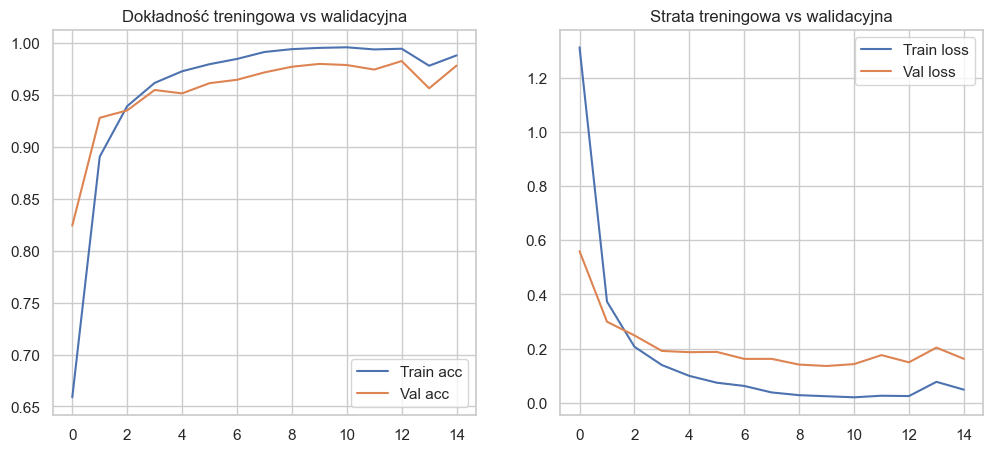

In [5]:
# Konwersja do TensorFlow format
# Inicjalizacja enkodera
le = LabelEncoder()

# Dopasowanie i transformacja y_train i y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Definicja sieci
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback do zatrzymania jeśli brak poprawy
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Trenowanie sieci
history = model_nn.fit(X_train, y_train_encoded, epochs=50, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Ocena na testowym
loss, acc = model_nn.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Dokładność sieci neuronowej: {acc:.4f}")

# Wykres uczenia się
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Dokładność treningowa vs walidacyjna')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Strata treningowa vs walidacyjna')

plt.show()